In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

df = pd.read_csv('data/clean.csv')
display(df.shape)
df.head()

(1548823, 15)

,id,databaseType,totalMem,timeRead,timeDelete,totalTime,timestamp,serverType,clientTotalTime,requestSize,frequency,instanceType,freeMem,timeWrite,memUsage
0,VWo2CJrUe,sql,2.147484e+09,3.0,81.0,236.0,1.585877e+12,java,425.0,1.0,1.0,b1,1.887261e+09,8.0,0.121176
1,Ge9D-u1oz,sql,2.147484e+09,3.0,91.0,299.0,1.585877e+12,java,489.0,1.0,1.0,b1,1.887121e+09,9.0,0.121241
2,W789KeB31,sql,2.147484e+09,3.0,7.0,154.0,1.585877e+12,java,292.0,1.0,1.0,b1,1.886994e+09,10.0,0.121300
3,YW4UJ3m4N,sql,2.147484e+09,86.0,8.0,255.0,1.585877e+12,java,448.0,1.0,1.0,b1,1.886646e+09,10.0,0.121462
4,RRAbhpXkJ,sql,2.147484e+09,4.0,6.0,152.0,1.585877e+12,java,288.0,1.0,1.0,b1,1.886482e+09,9.0,0.121538


In [2]:
all_keys = ['clientTotalTime', 'cpuUsage', 'databaseType', 'freeMem', 'frequency', 'id', 'instanceType', 'requestSize', 'serverType', 'timeDelete', 'timeRead', 'timeWrite', 'timestamp', 'totalMem', 'totalTime']

servers = sorted(['java', 'nodejs'])
databases = sorted(['nosql', 'sql'])
instances = sorted(['b1', 'b2', 'b4', 'b8'])

combinations = [(servers[0], databases[0]), (servers[1], databases[0]), (servers[0], databases[1]), (servers[1], databases[1])]

sizes = sorted(list(df['requestSize'].unique()))
frequencies = sorted(list(df['frequency'].unique()))

In [3]:
def plot_request_sizes(metric):
    fig, axes = plt.subplots(4)

    for i, instance in enumerate(instances):
        ax = axes[i]

        for combination in combinations:
            server, database = combination

            partial = df.loc[(df['instanceType'] == instance) & (df['serverType'] == server) & (df['databaseType'] == database) & (df[metric] != -1)]
            unique_sizes = sorted(list(partial['requestSize'].unique()))
            
            x_vals = []
            y_vals = []
            
            for size in unique_sizes:
                partial_sizes = partial.loc[df['requestSize'] == size]
                
                if (partial_sizes.shape[0] > 0):
                    x_vals.append(size)
                    y_vals.append(partial_sizes[metric].mean())
                    
            ax.plot(x_vals, y_vals, label=combination)
            
        ax.set_ylim(0)
        ax.set_xticks(sizes)
        ax.set_title(instance.upper() + ' - ' + metric)
        ax.set_xlabel('Payload Sizes (KB)')
        ax.set_ylabel('Time (ms)')
        ax.autoscale_view() 
        ax.legend()
        ax.grid(True)
        
    fig.set_size_inches(22, 25)
    plt.savefig('graphs/times/size-based-{}.png'.format(metric), bbox_inches='tight')
    plt.show()

    
def plot_frequencies(metric):
    fig, axes = plt.subplots(4)

    for i, instance in enumerate(instances):
        ax = axes[i]

        for combination in combinations:
            server, database = combination

            partial = df.loc[(df['instanceType'] == instance) & (df['serverType'] == server) & (df['databaseType'] == database)]
            unique_frequencies = sorted(list(partial['frequency'].unique()))
            
            x_vals = []
            y_vals = []
            
            for freq in unique_frequencies:
                partial_freqs = partial.loc[df['frequency'] == freq]
                
                if (partial_freqs.shape[0] > 0):
                    x_vals.append(freq)
                    y_vals.append(partial_freqs[metric].mean())
                    
            ax.plot(x_vals, y_vals, label=combination)
            
        ax.set_ylim(0)
        ax.set_xticks(frequencies)
        ax.set_title(instance.upper() + ' - ' + metric)
        ax.set_xlabel('Frequencies (Hz)')
        ax.set_ylabel('Time (ms)')
        ax.autoscale_view()
        ax.legend()
        ax.grid(True)
        
    fig.set_size_inches(22, 25)
    plt.savefig('graphs/times/frequency-based-{}.png'.format(metric), bbox_inches='tight')
    plt.show()

### Payload Size Plots

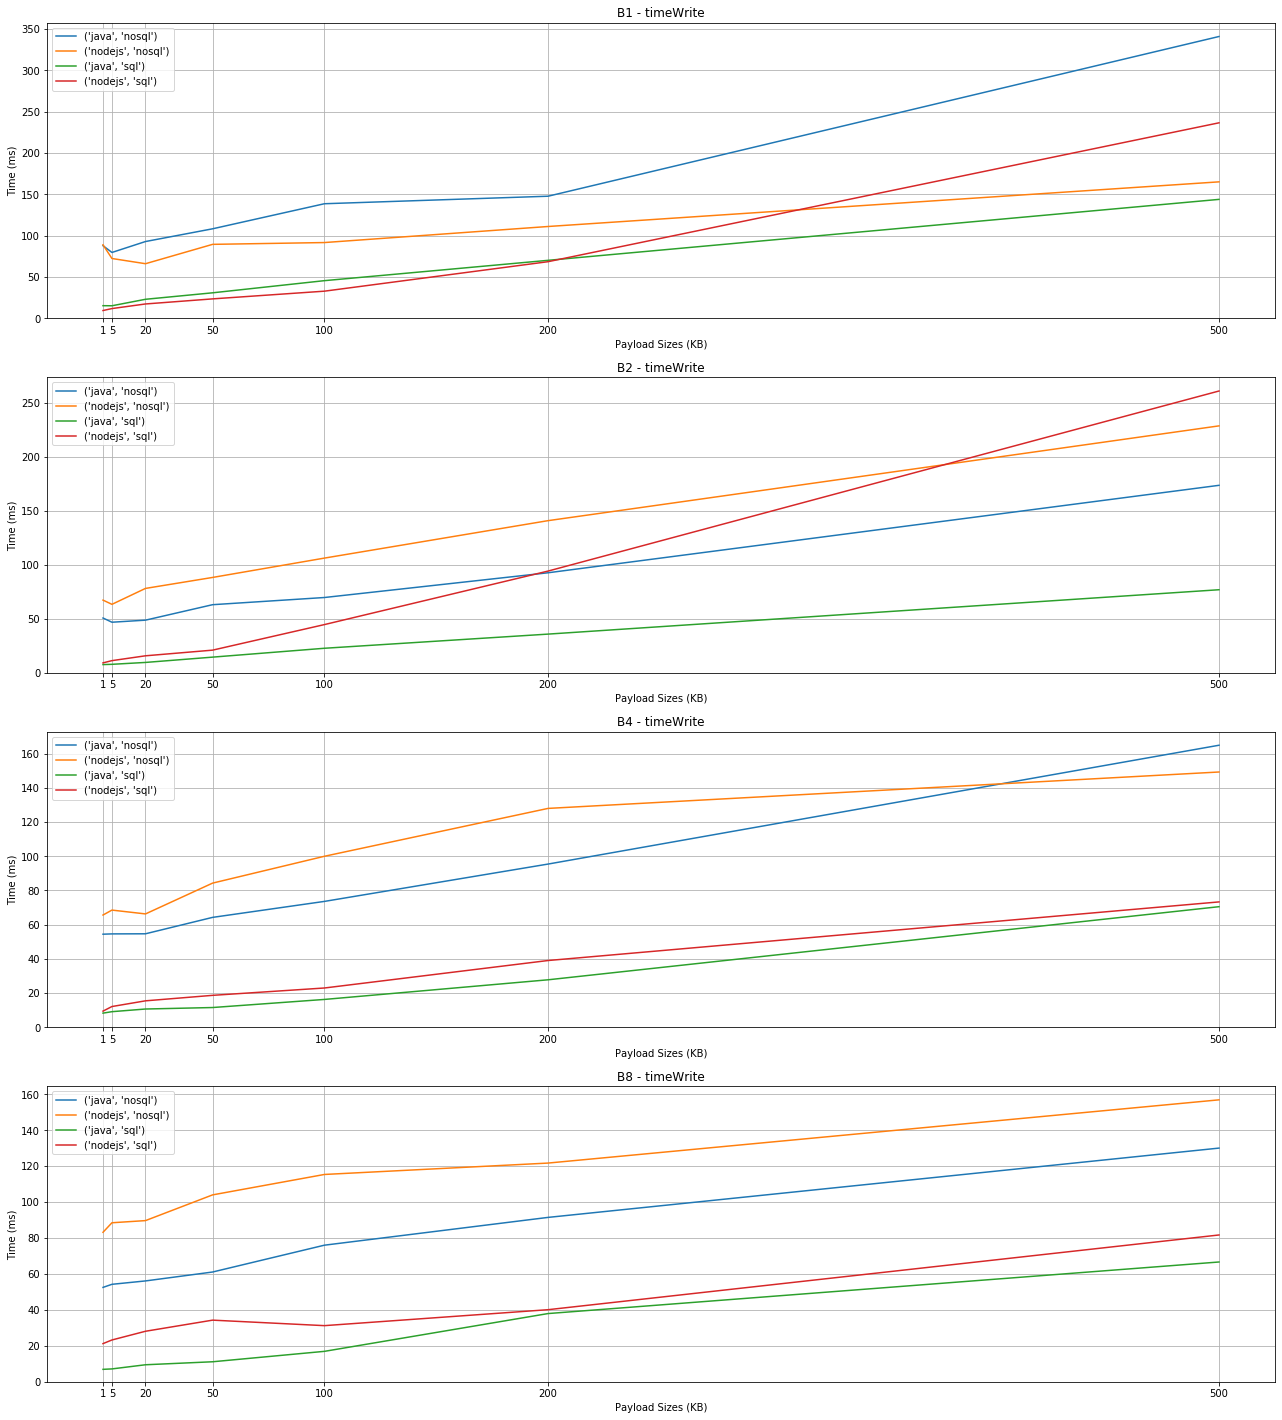

In [4]:
plot_request_sizes('timeWrite')

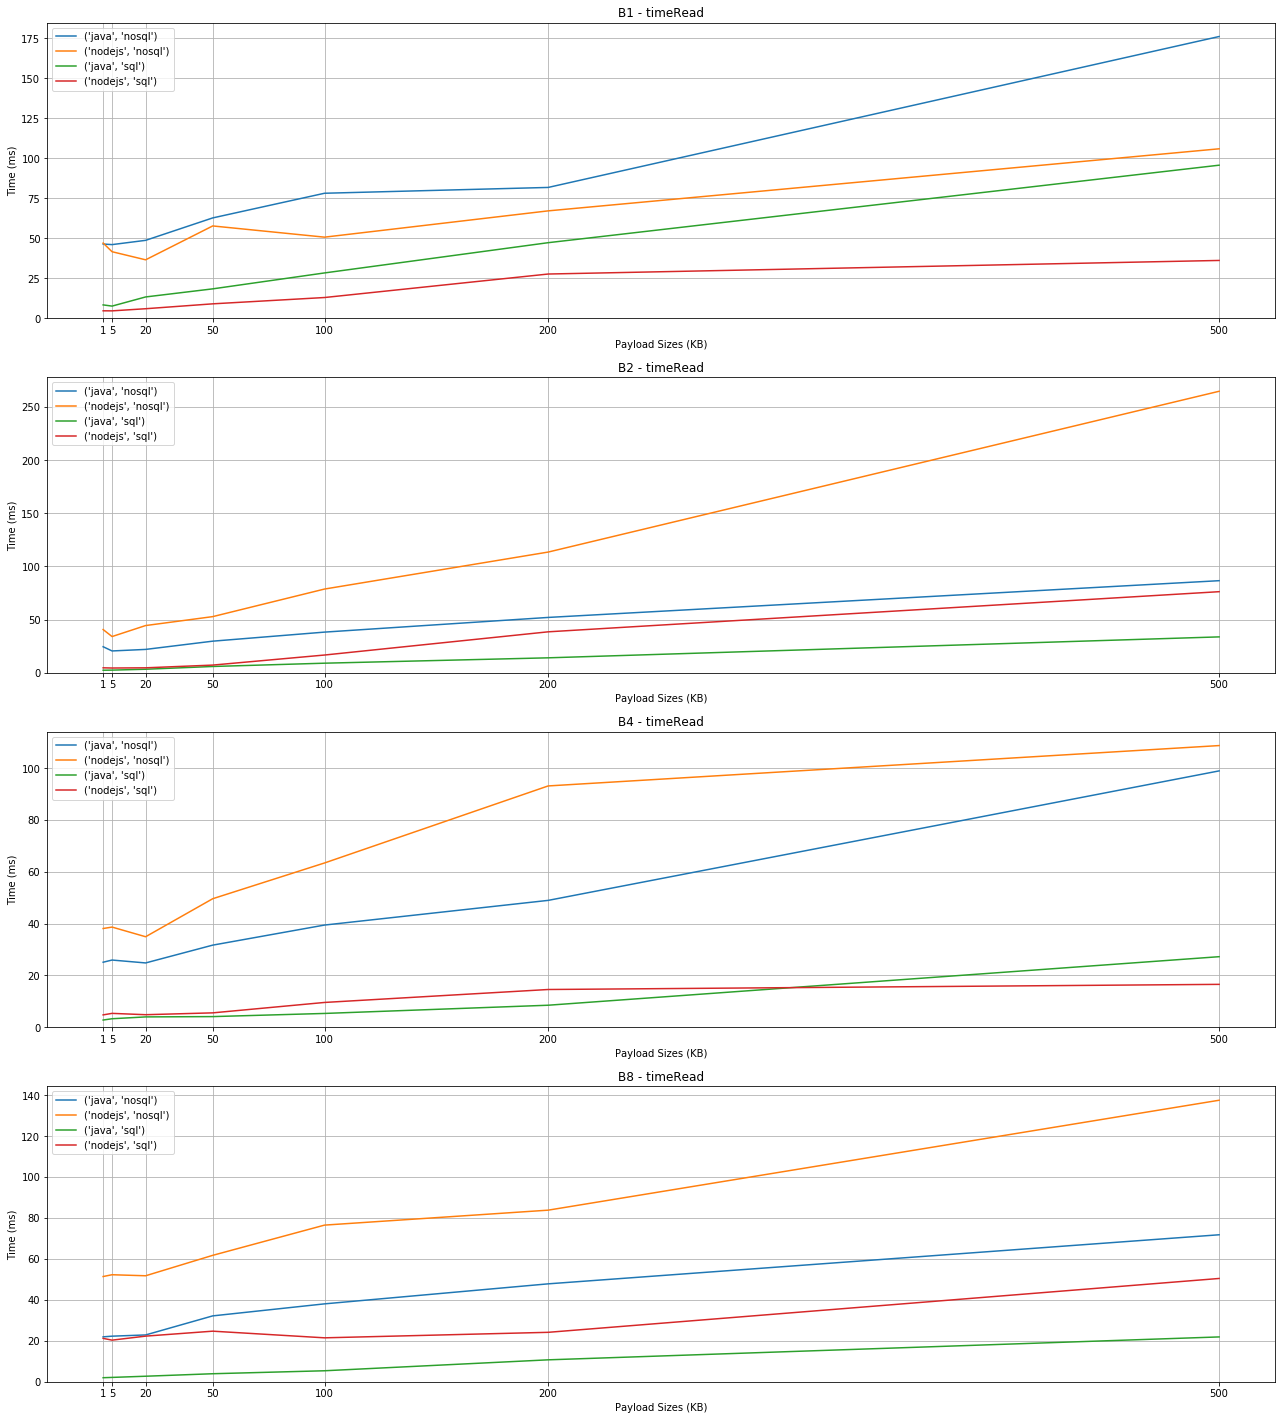

In [5]:
plot_request_sizes('timeRead')

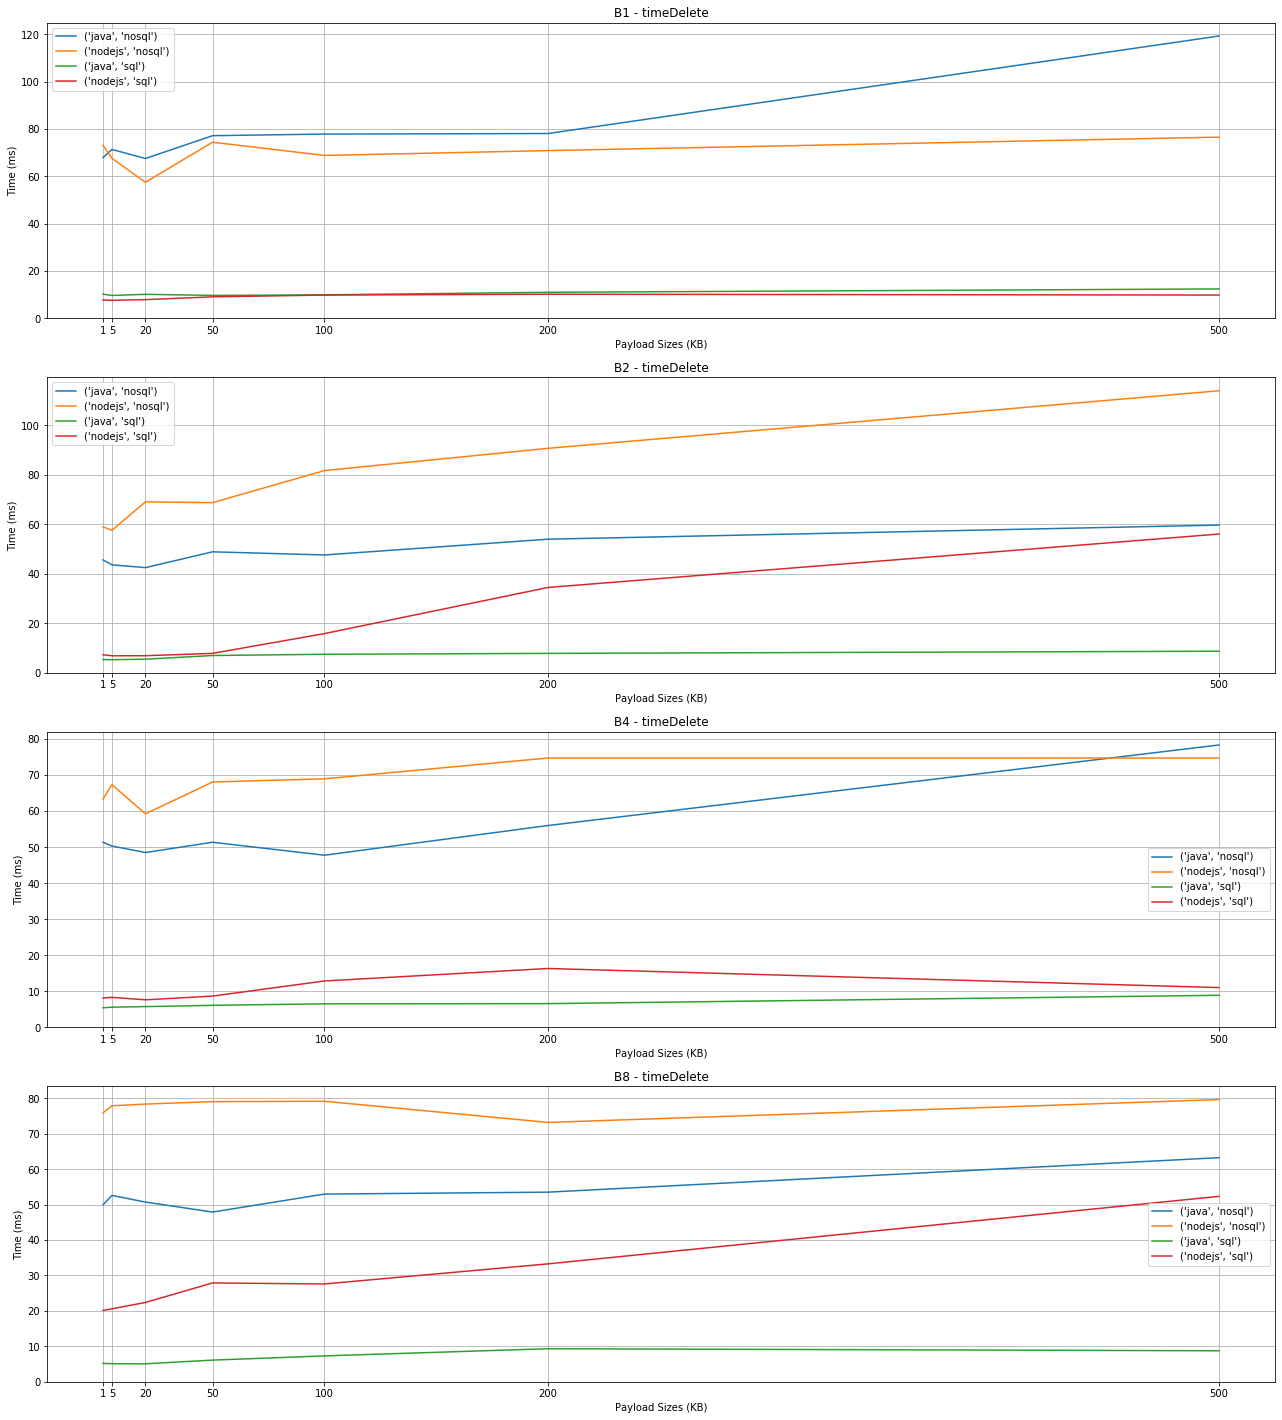

In [6]:
plot_request_sizes('timeDelete')

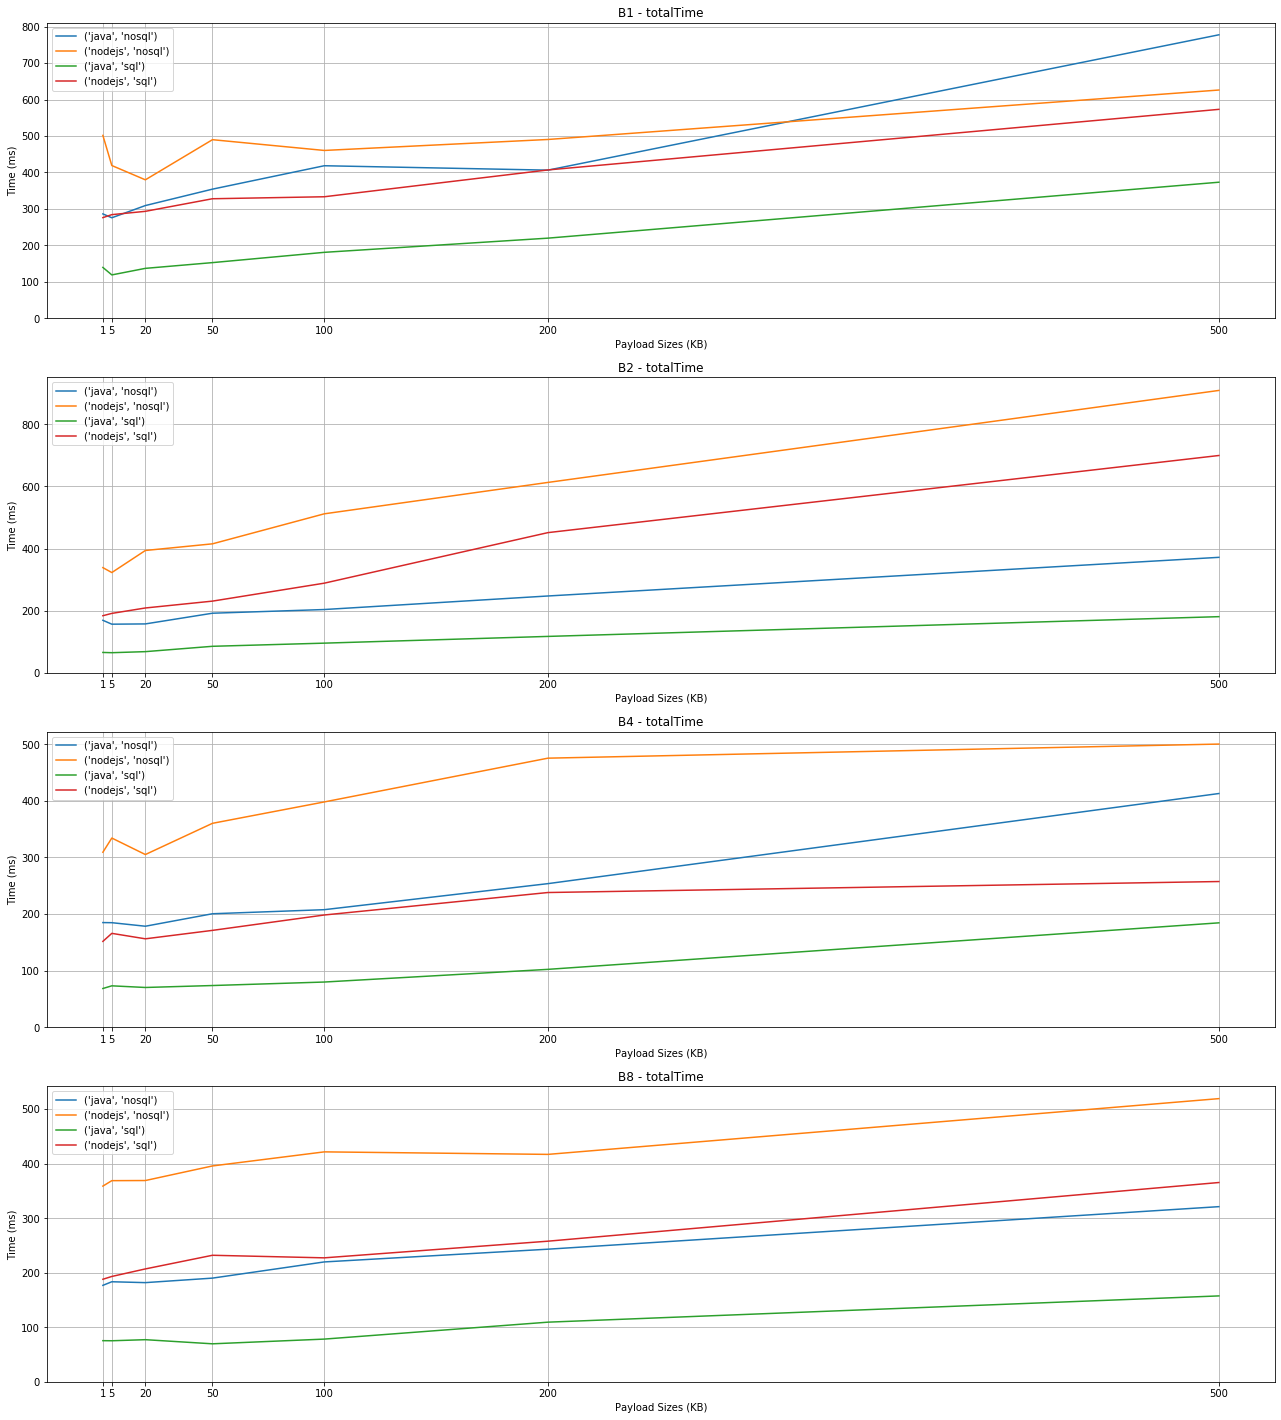

In [7]:
plot_request_sizes('totalTime')

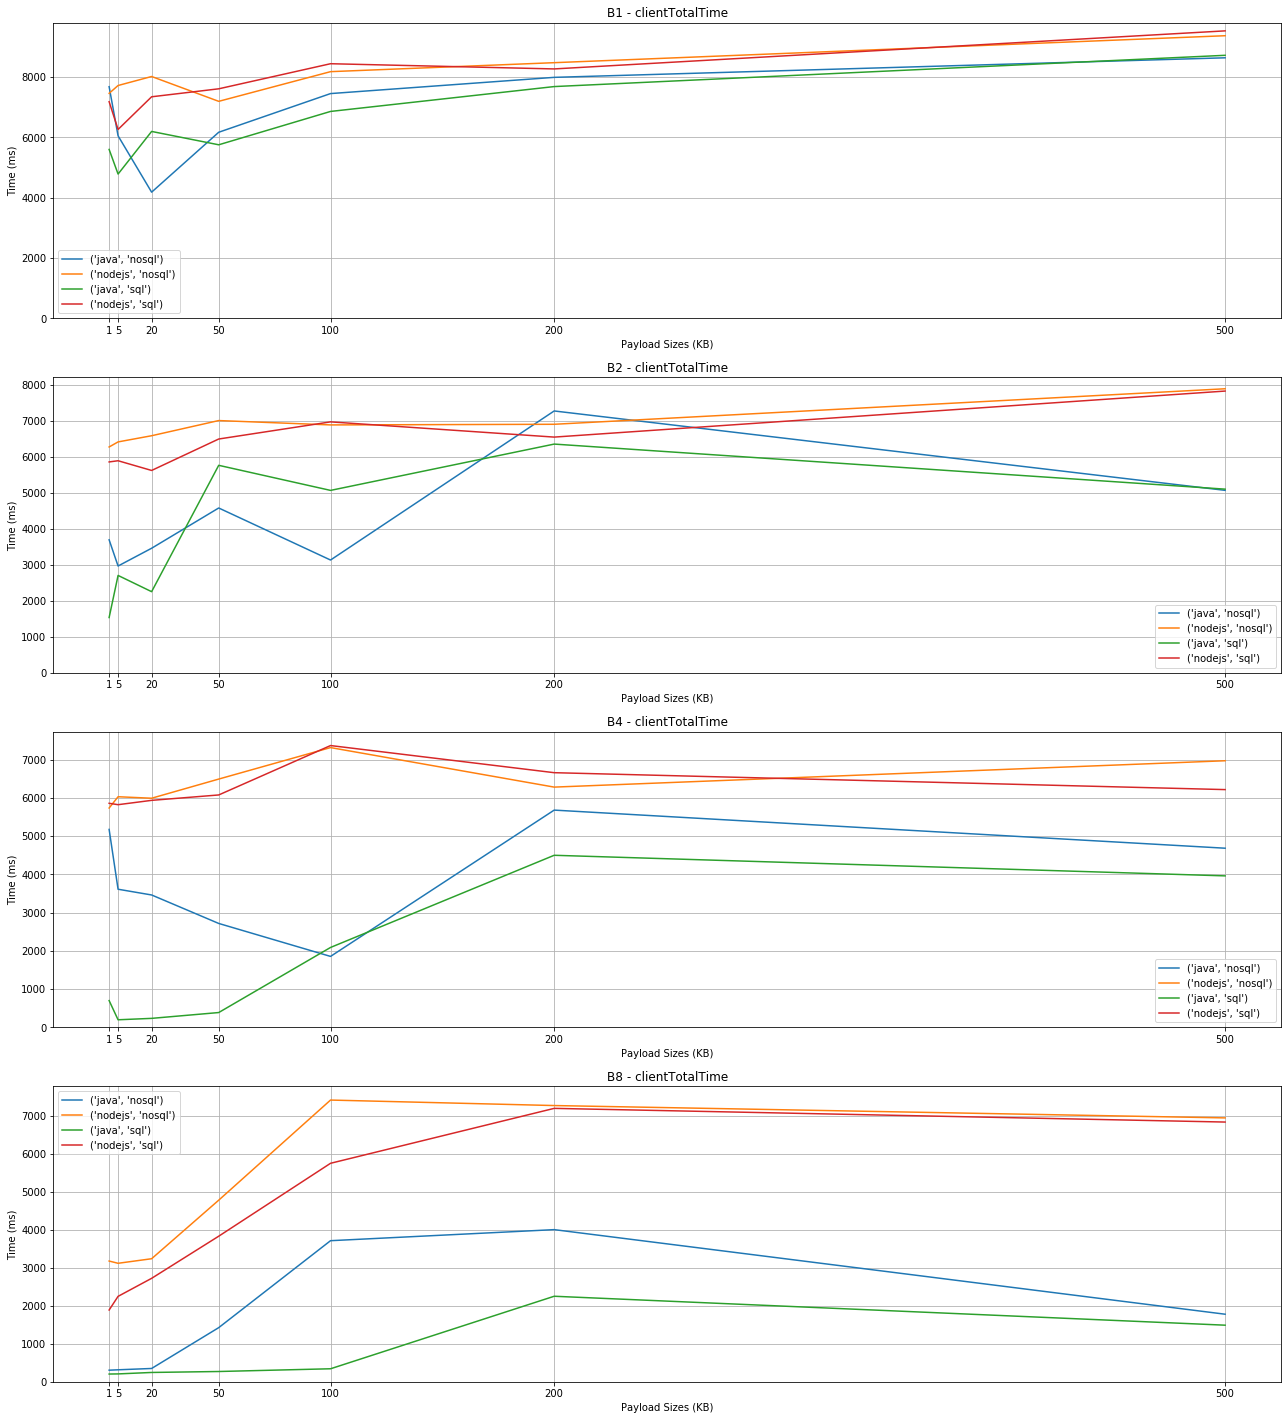

In [8]:
plot_request_sizes('clientTotalTime')

### Frequency Plots

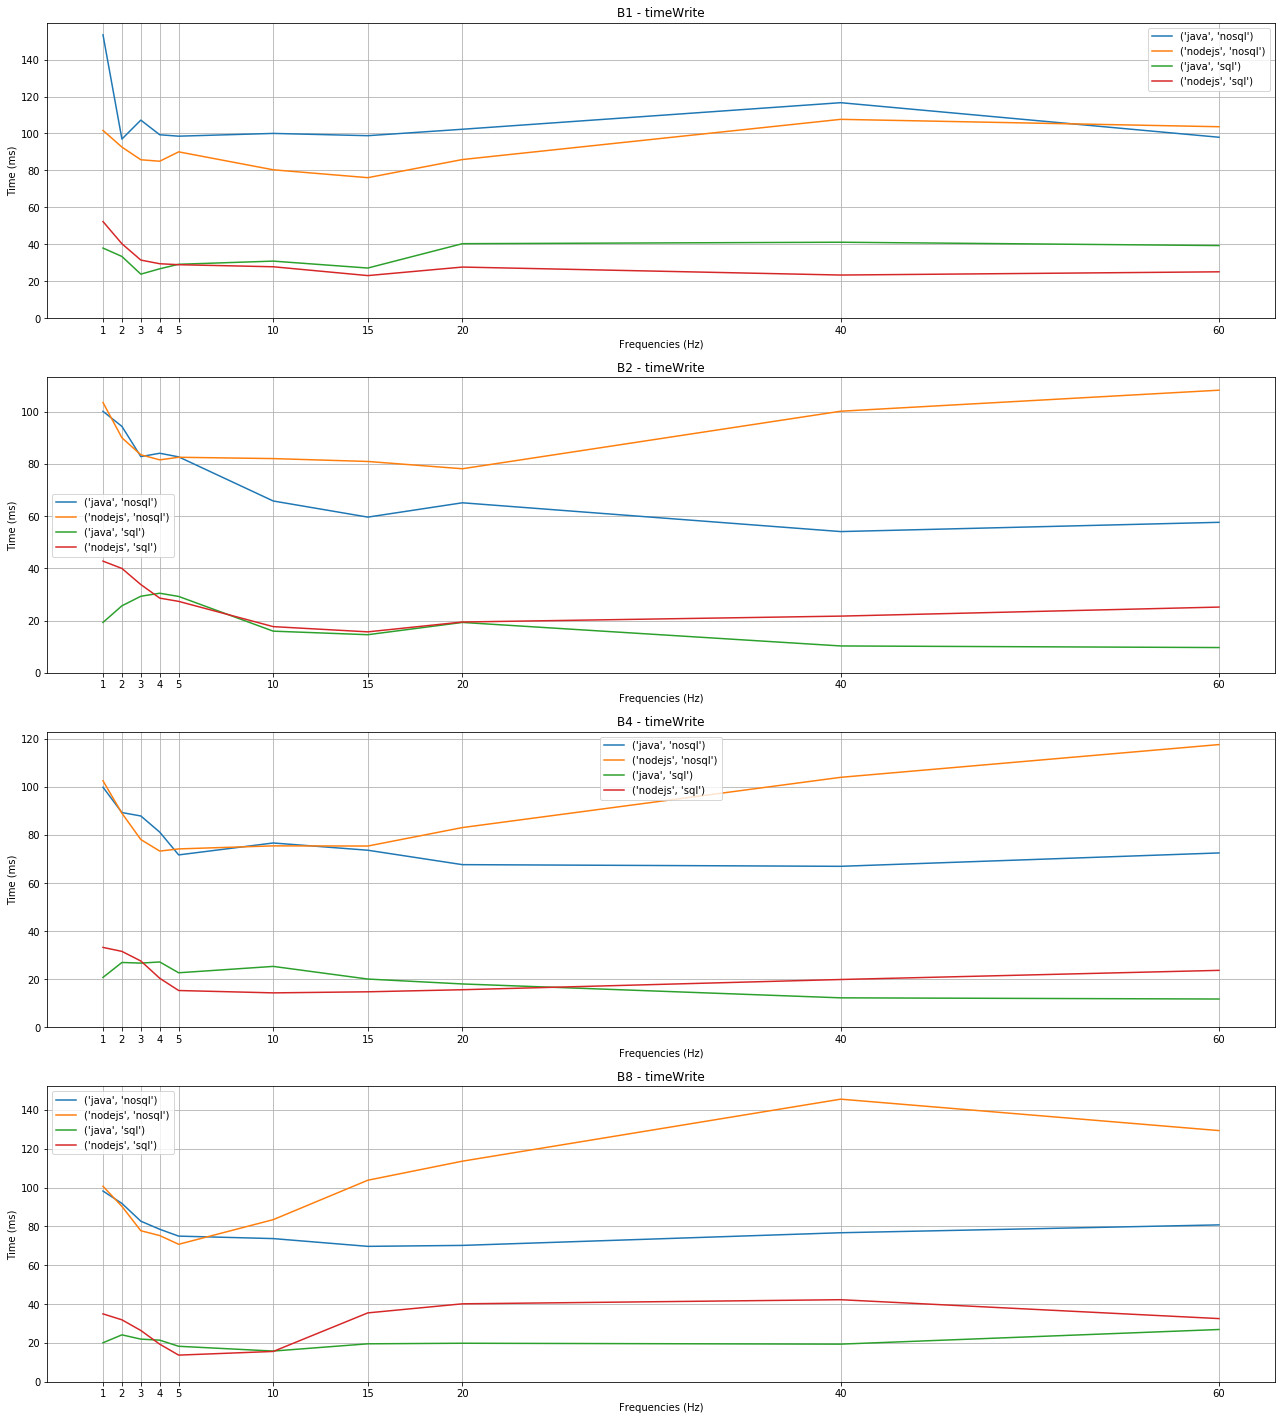

In [9]:
plot_frequencies('timeWrite')

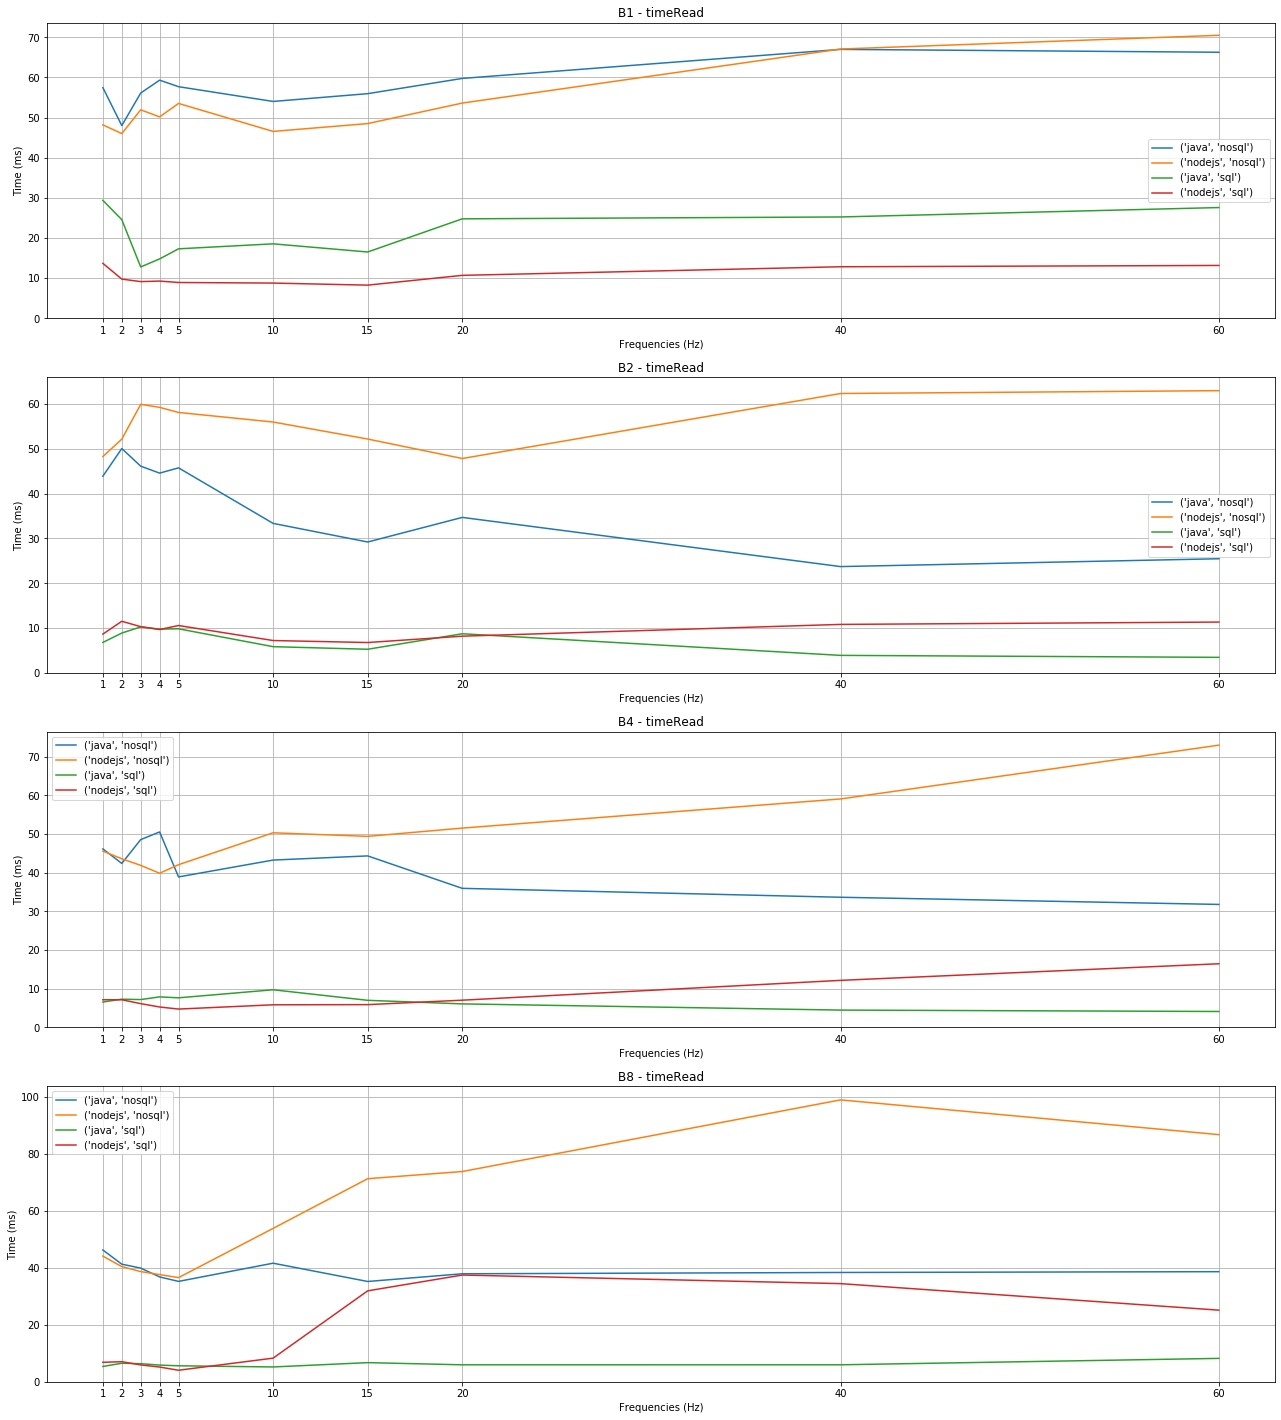

In [10]:
plot_frequencies('timeRead')

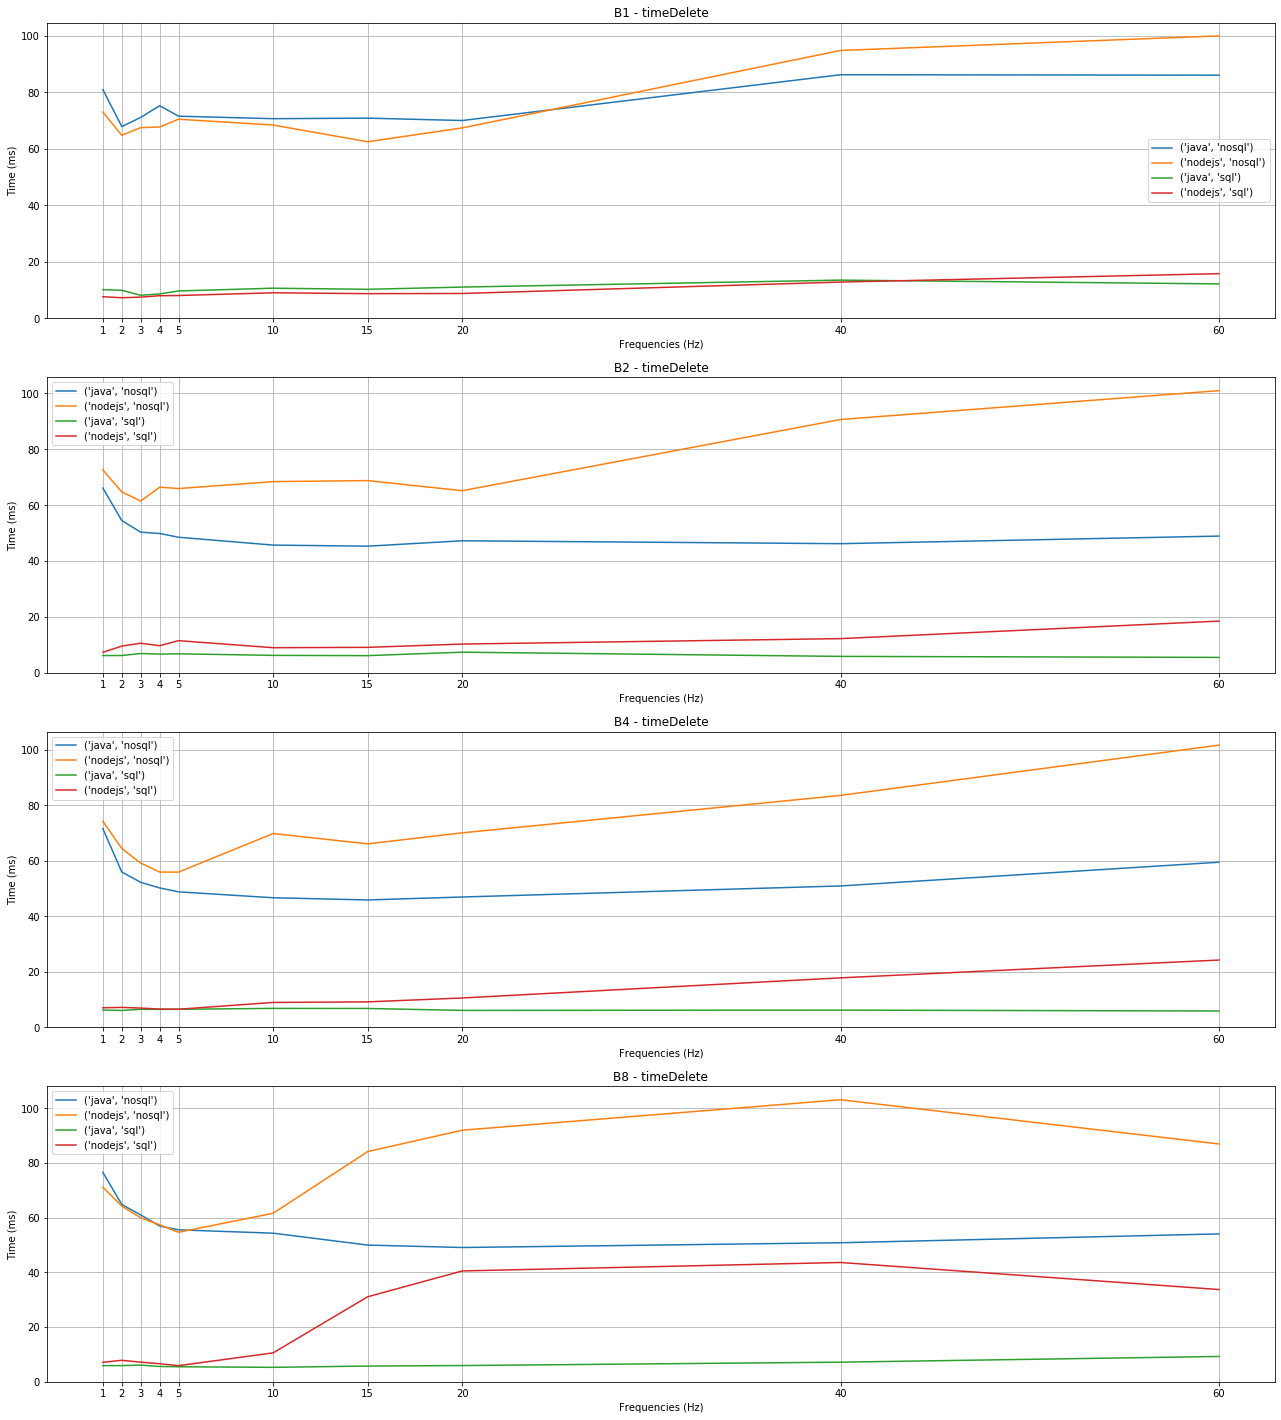

In [11]:
plot_frequencies('timeDelete')

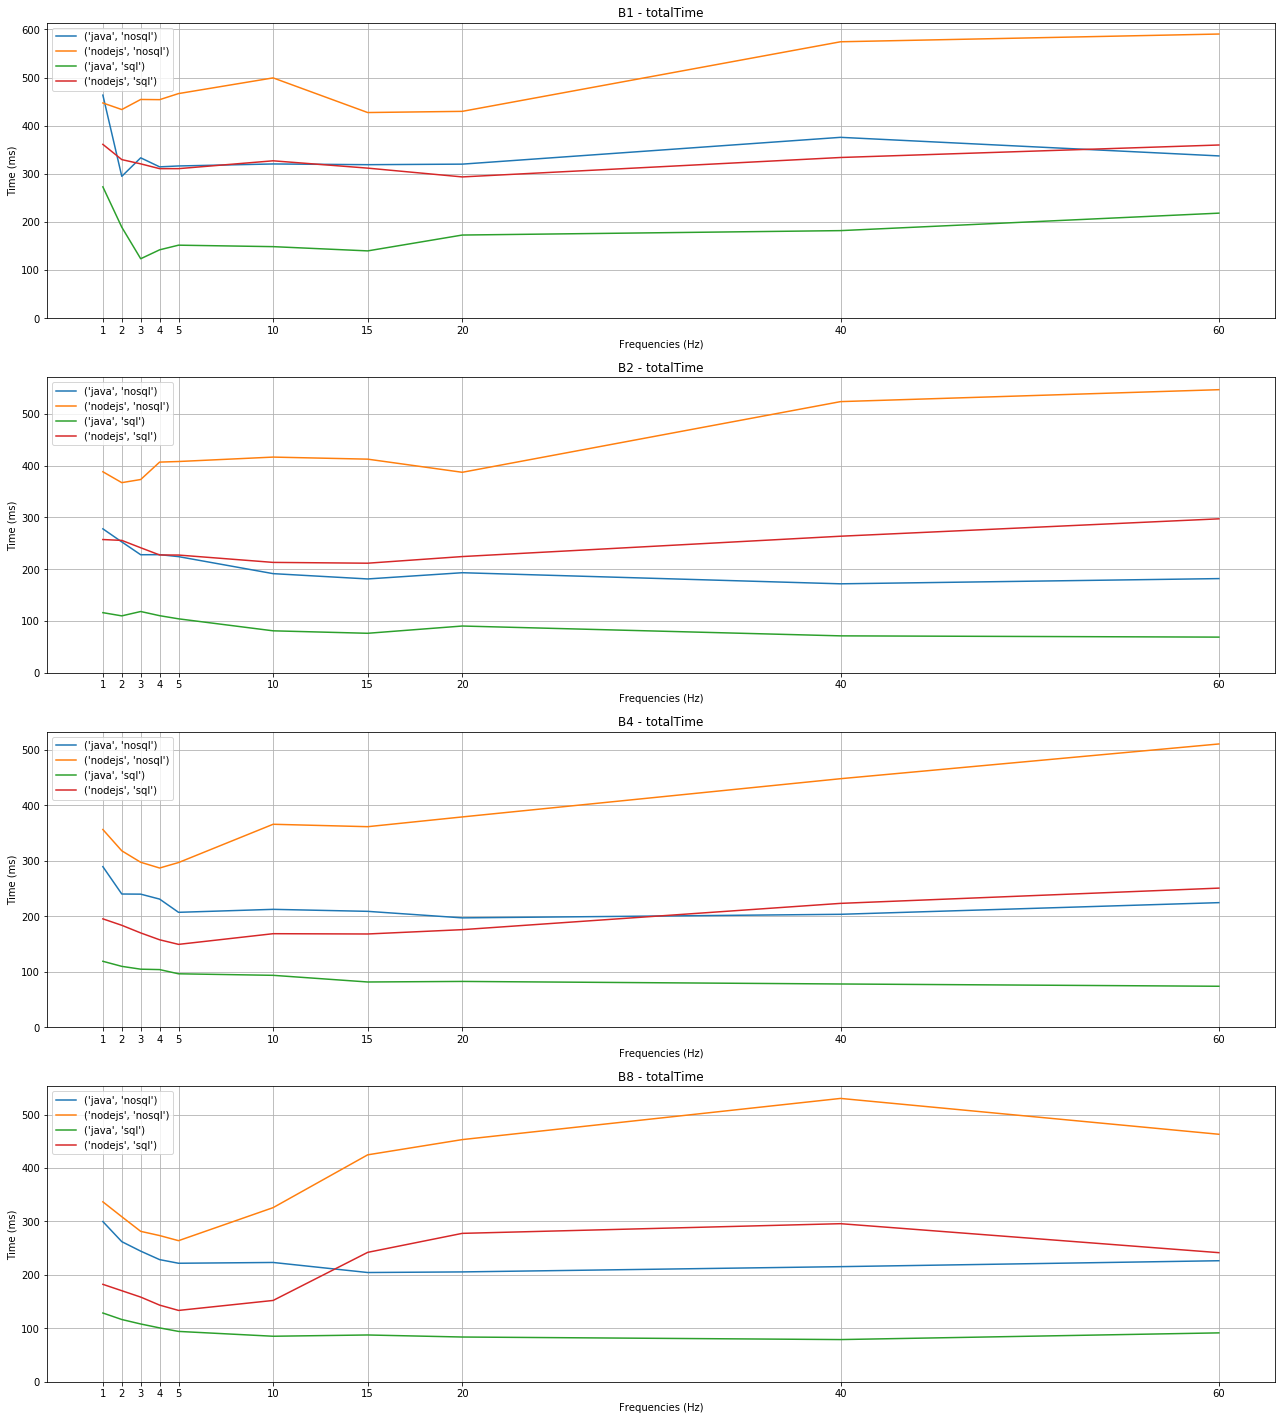

In [12]:
plot_frequencies('totalTime')

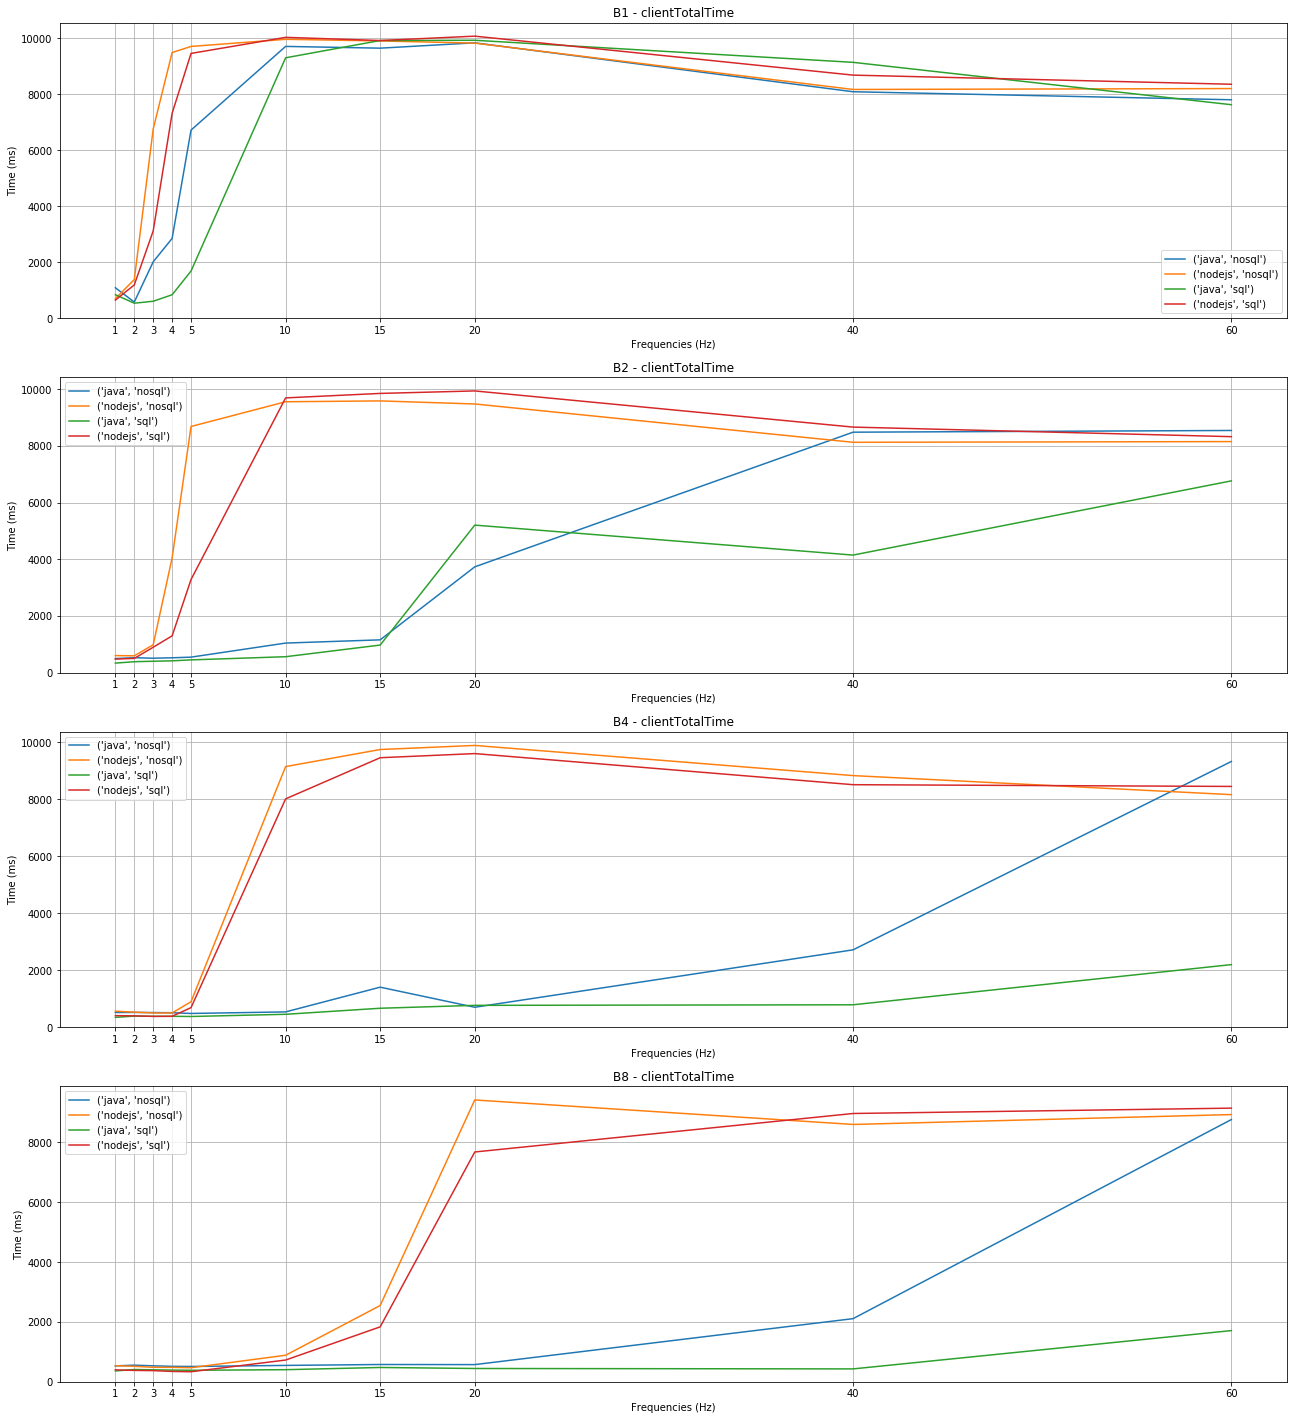

In [13]:
plot_frequencies('clientTotalTime')